# Ask a Manager Survey

[TidyTuesday 2021-05-18](https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-05-18/readme.md)

Mostly following along with David Robinson:<br/>
[Tidy Tuesday live screencast: Analyzing salary survey in R](https://www.youtube.com/watch?v=2HpRXIpU4jI)

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns
import histlite as hl

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
survey = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-18/survey.csv', parse_dates=['timestamp'])
survey

,timestamp,how_old_are_you,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,race
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26227,2021-05-17 17:42:33,25-34,Media & Digital,Senior Reporter,Trade publication,85000,2000.0,USD,NaN,NaN,USA,New York,New York City,5-7 years,5-7 years,College degree,Woman,White
26228,2021-05-17 17:46:38,35-44,Nonprofits,Production and Workflow Manager,NaN,40000,NaN,USD,NaN,NaN,USA,Pennsylvania,Pittsburgh,11 - 20 years,2 - 4 years,College degree,Woman,Asian or Asian American
26229,2021-05-17 17:47:30,25-34,Computing or Tech,Chief of Staff,NaN,148000,29000.0,USD,NaN,NaN,USA,California,Bay Area,11 - 20 years,11 - 20 years,Master's degree,Woman,White
26230,2021-05-17 18:20:07,25-34,"Marketing, Advertising & PR",Digital Marketing Manager,"Small agency. I manage a team of ~15 people, b...",65000,5000.0,USD,NaN,NaN,United States,Washington,Seattle,2 - 4 years,2 - 4 years,College degree,Woman,White


In [4]:
survey.how_old_are_you.replace('under 18', '0-18').value_counts().sort_index()

0-18             10
18-24          1015
25-34         11748
35-44          9398
45-54          3042
55-64           931
65 or over       88
Name: how_old_are_you, dtype: int64

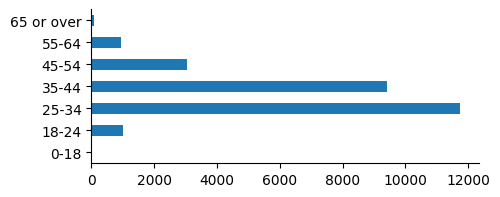

In [5]:
fig, ax = plt.subplots(figsize=(5,2))
survey.how_old_are_you.replace('under 18', '0-18').value_counts().sort_index().plot.barh();

In [6]:
survey.industry.value_counts()

Computing or Tech                         4360
Education (Higher Education)              2359
Nonprofits                                2331
Government and Public Administration      1821
Health care                               1739
                                          ... 
Probiotics                                   1
Virtual reality                              1
Fashion/e-commerce                           1
Food & Nutrition                             1
Daycare for children under 5 years old       1
Name: industry, Length: 1068, dtype: int64

In [7]:
survey.job_title.value_counts()

Software Engineer                                 289
Project Manager                                   242
Director                                          211
Senior Software Engineer                          200
Executive Assistant                               171
                                                 ... 
Manager Learning & Training                         1
dependency case manager                             1
Alliance Manager                                    1
Compliance & Risk Officer                           1
Manager of Executive Office and Administration      1
Name: job_title, Length: 12622, dtype: int64

In [8]:
survey_usd = survey.query("""annual_salary.between(5e3,1e6) & currency.eq('USD')""").copy()
survey_usd['state'] = survey_usd.state.str.split(', ').str[0]
survey_usd['experience_overall'] = (
    survey_usd.overall_years_of_professional_experience
    .str.replace(' - ', '-') )
survey_usd['experience_in_field'] = (
    survey_usd.years_of_experience_in_field
    .str.replace(' - ', '-') )
survey_usd['age_category'] = survey_usd.how_old_are_you.replace('under 18', '<= 17')
survey_usd['gender'] = (
    survey_usd.gender
    .str.replace('Prefer not to answer', 'Other or prefer not to answer')
    .str.replace('Other$', 'Other or prefer not to answer')
    .fillna('Other or prefer not to answer'))

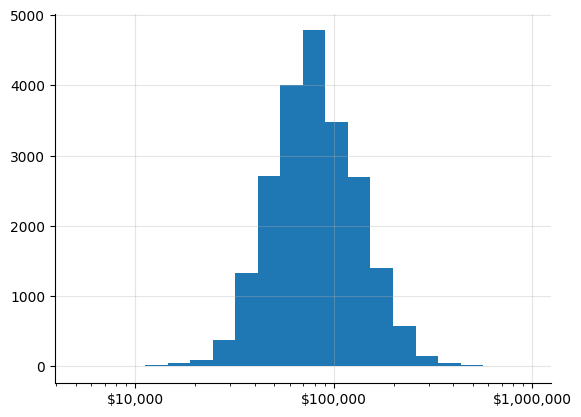

In [9]:
fig, ax = plt.subplots()
d = survey_usd
hl.plot1d(ax, hl.hist(d.annual_salary, bins=20, log=True), fill=True)
ax.semilogx()
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.grid()

In [10]:
def showall():
    return pd.option_context('display.max_rows', None)

In [11]:
with showall():
    display(survey_usd.state.value_counts())

California              2435
New York                2038
Massachusetts           1458
Texas                   1168
Illinois                1127
Washington              1120
District of Columbia     960
Pennsylvania             877
Virginia                 730
Minnesota                670
Ohio                     614
Colorado                 589
Oregon                   584
North Carolina           559
Maryland                 535
Michigan                 500
Georgia                  495
Florida                  478
Wisconsin                442
New Jersey               371
Missouri                 312
Indiana                  303
Arizona                  290
Tennessee                264
Connecticut              224
Utah                     190
Iowa                     175
Kentucky                 170
Kansas                   143
South Carolina           137
Maine                    120
Louisiana                118
New Hampshire            111
Alabama                  108
Oklahoma      

In [12]:
def lump(d, col, n=5):
    d = d.copy()
    top_values = d.value_counts(col).head(n)
    d[col] = [v if v in top_values.index else 'Other' for v in d[col]]
    return d

In [13]:
def extract_numeric(s):
    return s.str.extract(r'(\d+)')[0].astype(int)

In [14]:
lump(survey_usd, 'state', 10).state.value_counts()

Other                   9193
California              2435
New York                2038
Massachusetts           1458
Texas                   1168
Illinois                1127
Washington              1120
District of Columbia     960
Pennsylvania             877
Virginia                 730
Minnesota                670
Name: state, dtype: int64

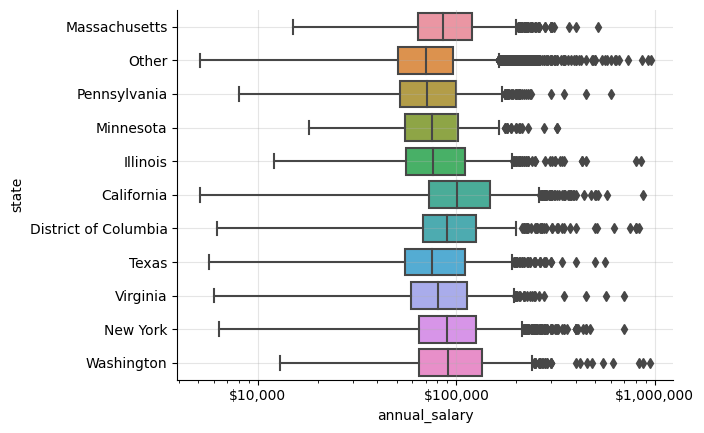

In [15]:
ax = sns.boxplot('annual_salary', 'state', data=lump(survey_usd, 'state', 10))
ax.semilogx()
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.grid()

In [16]:
def summarize_salary(gb):
    return gb.agg(n=('annual_salary', 'count'), median_salary=('annual_salary', 'median'))

In [17]:
def plot_categorical(d, col, levels=5, sort='n', reverse=False, **kw):
    if levels is not None:
        d = lump(d, col, levels)
    x = (
        d.groupby(col)
        .pipe(summarize_salary)
        .reset_index()
    )
    if sort == 'n':
        x = x.sort_values('n', ascending=False)
    elif sort == 'values':
        x = x.sort_values('median_salary')
    elif sort == 'index':
        x = x.sort_values(col)
    elif sort == 'numeric':
        x = x.sort_values(col, key=extract_numeric)
    else:
        x = x.sort_values(col, key=sort)
    if reverse:
        x = x.iloc[::-1]
    ax = sns.barplot('median_salary', col, data=x, **kw)
    #ax.xaxis.set_major_formatter('${x:,.0f}')
    ax.grid()
    return ax

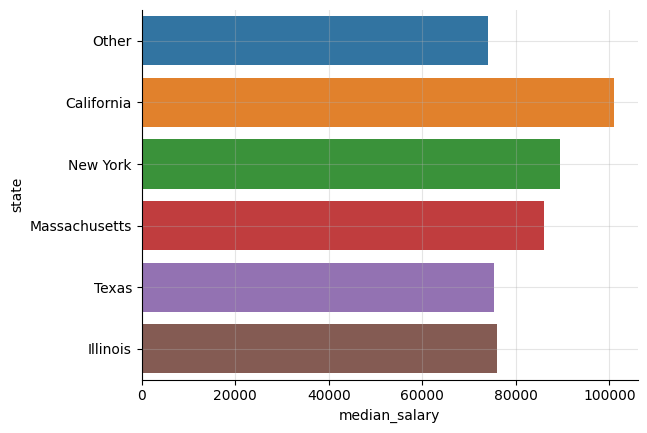

In [18]:
plot_categorical(survey_usd, 'state');

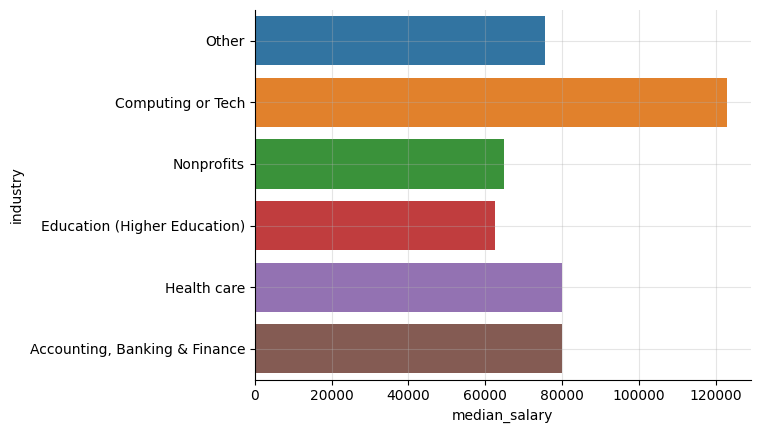

In [19]:
plot_categorical(survey_usd, 'industry');

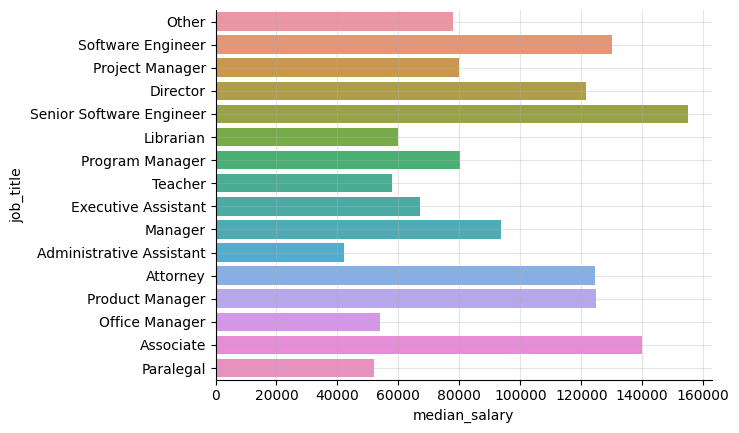

In [20]:
plot_categorical(survey_usd, 'job_title', levels=15);

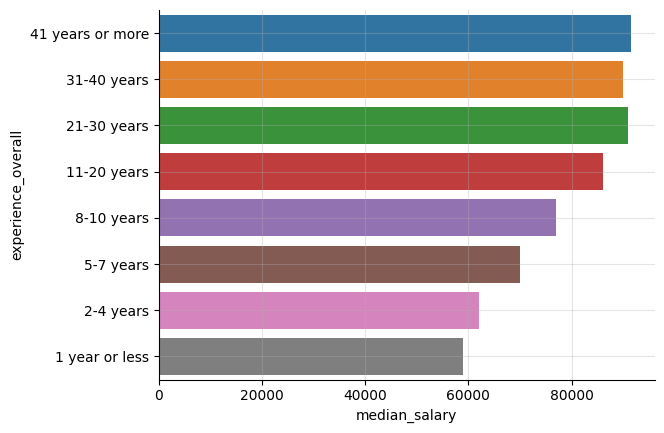

In [21]:
plot_categorical(survey_usd, 'experience_overall', levels=20, sort='numeric', reverse=True);

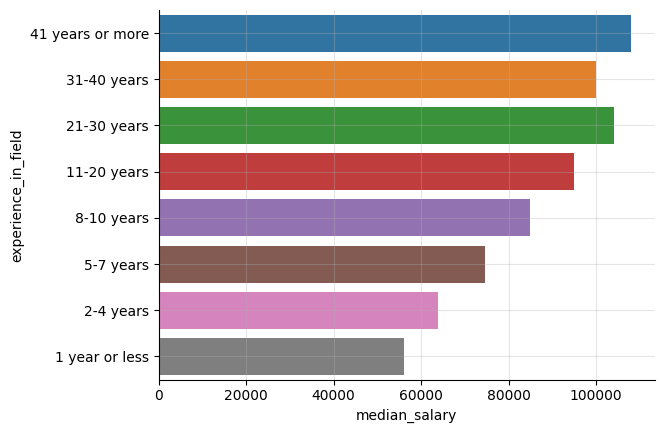

In [22]:
plot_categorical(survey_usd, 'experience_in_field', levels=20, sort='numeric', reverse=True);

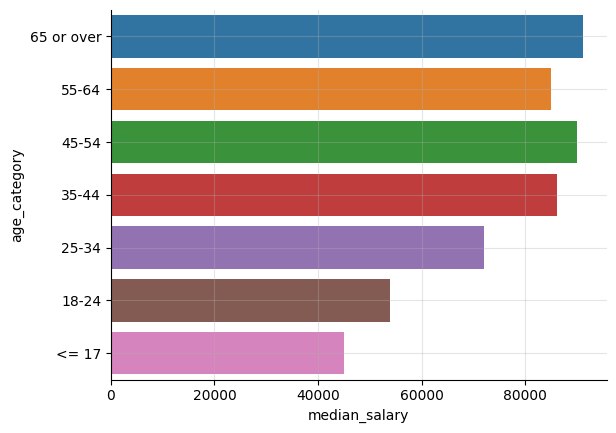

In [23]:
plot_categorical(survey_usd, 'age_category', levels=20, sort='numeric', reverse=True);

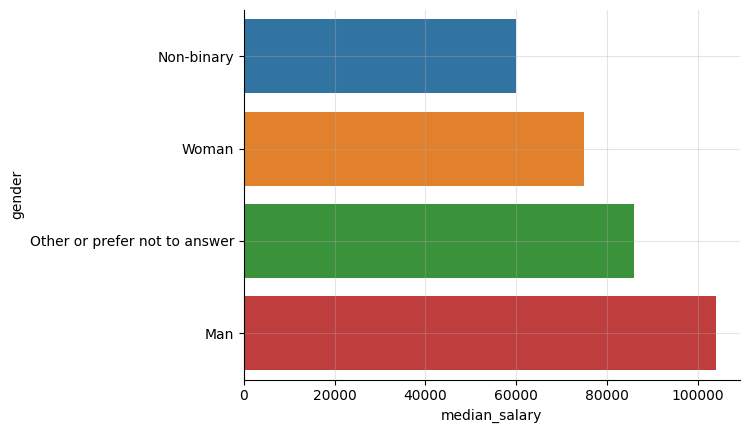

In [24]:
plot_categorical(survey_usd, 'gender', levels=20, sort='values');

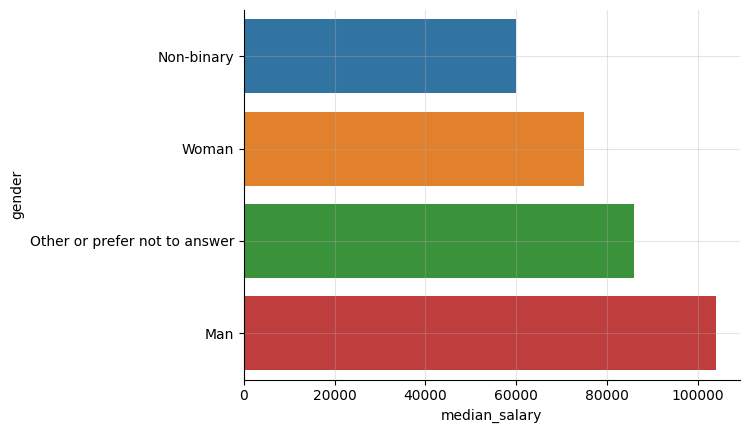

In [25]:
plot_categorical(survey_usd, 'gender', levels=20, sort='values');

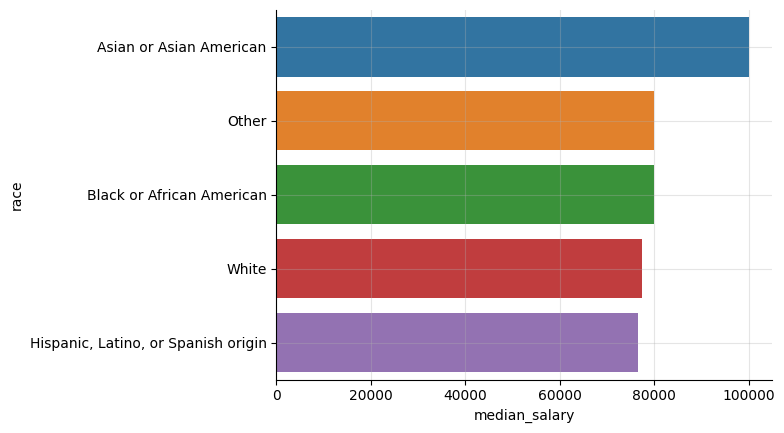

In [26]:
plot_categorical(survey_usd, 'race', levels=4, sort='values', reverse=True);

In [27]:
m = smf.ols('y ~ C(experience_overall)',
            survey_usd
            .assign(y=np.log2(survey_usd.annual_salary))
           ).fit()
#display(m.summary())
print(m.rsquared_adj)
#sm.stats.anova_lm(m, typ=2)

0.05926047097979137


In [28]:
m = smf.ols('y ~ C(experience_in_field)',
            survey_usd
            .assign(y=np.log2(survey_usd.annual_salary))
           ).fit()
#display(m.summary())
print(m.rsquared_adj)
#sm.stats.anova_lm(m, typ=2)

0.10825163540604588


In [29]:
m = smf.ols('y ~ C(job_title)',
            survey_usd
            .assign(y=np.log2(survey_usd.annual_salary))
            .pipe(lump, 'job_title', 20)
       ).fit()
#display(m.summary())
print(m.rsquared_adj)
#sm.stats.anova_lm(m, typ=2)

0.055180290896241546


In [30]:
m = smf.ols('y ~ C(gender)',
            survey_usd
            .assign(y=np.log2(survey_usd.annual_salary))
       ).fit()
#display(m.summary())
print(m.rsquared_adj)
#sm.stats.anova_lm(m, typ=2)

0.0457839878787224


In [31]:
m = smf.ols('y ~ C(race)',
            survey_usd
            .assign(y=np.log2(survey_usd.annual_salary))
       ).fit()
#display(m.summary())
print(m.rsquared_adj)
#sm.stats.anova_lm(m, typ=2)

0.00926073617310652


In [32]:
m = smf.ols(
    """
    y ~   C(job_title)
        + C(state) 
        + C(industry) 
        + C(race) 
        + C(gender) 
        + C(experience_in_field) 
    """,
    survey_usd
    .pipe(lump, 'job_title', 10)
    .pipe(lump, 'state', 10)
    .pipe(lump, 'industry', 10)
    .pipe(lump, 'race', 4)
    .assign(y=np.log2(survey_usd.annual_salary))
).fit()
#display(m.summary())
print(m.rsquared_adj)
anova = sm.stats.anova_lm(m, typ=2).assign(pct_variation = lambda x: x.sum_sq / x.sum_sq.sum())
anova.sort_values('pct_variation', ascending=False)

0.3541414933836121


,sum_sq,df,F,PR(>F),pct_variation
Residual,7568.983928,21731.0,NaN,NaN,0.688037
C(industry),1301.354938,10.0,373.626690,0.000000e+00,0.118296
C(experience_in_field),1236.308469,7.0,507.073521,0.000000e+00,0.112383
C(state),633.688642,10.0,181.935753,0.000000e+00,0.057604
C(job_title),138.828938,10.0,39.858608,1.065758e-78,0.012620
C(gender),84.502193,3.0,80.870263,5.051542e-52,0.007681
C(race),37.170589,4.0,26.679739,4.132151e-22,0.003379
